##**Load thư viện OpenCV**

In [57]:
import cv2
import imutils
from imutils.object_detection import non_max_suppression
from matplotlib import pyplot as plt
import numpy as np

## **1. Load ảnh nhận diện người và chuyển ảnh sang gray**

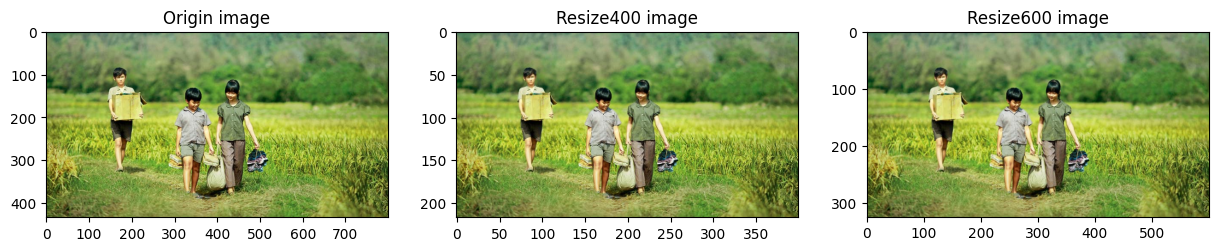

In [58]:
##Load và resize ảnh
img = cv2.imread("/content/con_nguoi_vn.jpg")
img400 = imutils.resize(img, width = min(400, img.shape[1]))
img600 = imutils.resize(img, width = min(600, img.shape[1]))

##Convert ảnh sang gray và rgb
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img400_gray = cv2.cvtColor(img400, cv2.COLOR_BGR2GRAY)
img400_rgb = cv2.cvtColor(img400, cv2.COLOR_BGR2RGB)
img600_gray = cv2.cvtColor(img600, cv2.COLOR_BGR2GRAY)
img600_rgb = cv2.cvtColor(img600, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(img_rgb), plt.title('Origin image')
plt.subplot(132), plt.imshow(img400_rgb), plt.title('Resize400 image')
plt.subplot(133), plt.imshow(img600_rgb), plt.title('Resize600 image')
plt.show()

## **2. Tạo bộ mô tả HOG và xác định vật thể với HOG**

In [50]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

(rect, weight) = hog.detectMultiScale(img_gray, winStride = (4, 4), padding = (8, 8), scale = 1.05)

(rect400, weight400) = hog.detectMultiScale(img400_gray, winStride = (4, 4), padding = (8, 8), scale = 1.05)

(rect600, weight600) = hog.detectMultiScale(img600_gray, winStride = (4, 4), padding = (8, 8), scale = 1.05)

print('Weight detect for orginal image: ', weight)
print('Weight detect for resize400 image: ', weight400)
print('Weight detect for resize600 image: ', weight600)

Weight detect for orginal image:  [1.06819271 0.56394837]
Weight detect for resize400 image:  [1.60321366 0.94850252 0.75696739]
Weight detect for resize600 image:  [1.3262632  0.70104118 0.82672672]


## **3. Xác định bouding box của ảnh con người**

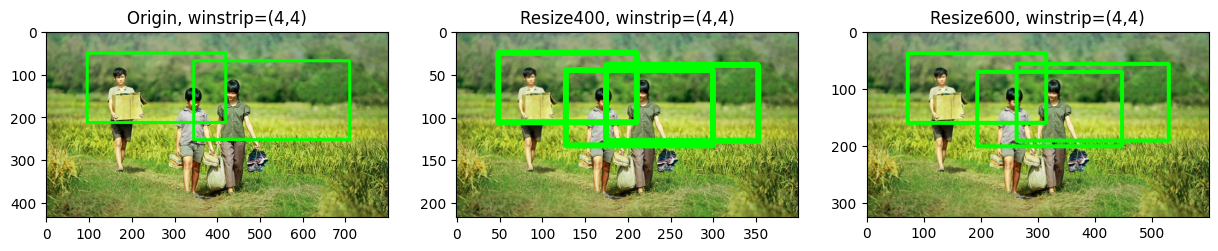

In [51]:
img1 = img_rgb.copy()
img2 = img400_rgb.copy()
img3 = img600_rgb.copy()
if len(rect) != 0:
  for (x, y, width, height) in rect:
    cv2.rectangle(img1, (x, y), (x + height, y + width), (0, 255, 0), 5)

if len(rect400) != 0:
  for (x, y, width, height) in rect400:
    cv2.rectangle(img2, (x, y), (x + height, y + width), (0, 255, 0), 5)

if len(rect600) != 0:
  for (x, y, width, height) in rect600:
    cv2.rectangle(img3, (x, y), (x + height, y + width), (0, 255, 0), 5)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(img1), plt.title('Origin, winstrip=(4,4)')
plt.subplot(132), plt.imshow(img2), plt.title('Resize400, winstrip=(4,4)')
plt.subplot(133), plt.imshow(img3), plt.title('Resize600, winstrip=(4,4)')
plt.show()

## **4. Sử dụng non_max_suppression để xác định lại bounding box tốt hơn**

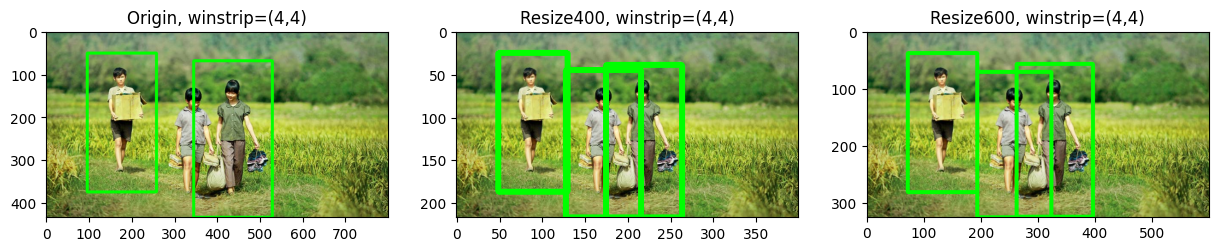

In [56]:
rect1 = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rect])
rect2 = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rect400])
rect3 = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rect600])
pick = non_max_suppression(rect1, probs = None, overlapThresh=0.8)
pick400 = non_max_suppression(rect2, probs = None, overlapThresh=0.8)
pick600 = non_max_suppression(rect3, probs = None, overlapThresh=0.8)

img1 = img_rgb.copy()
img2 = img400_rgb.copy()
img3 = img600_rgb.copy()
if len(pick) != 0:
  for (x, y, width, height) in pick:
    cv2.rectangle(img1, (x, y), (width, height), (0, 255, 0), 5)

if len(pick400) != 0:
  for (x, y, width, height) in pick400:
    cv2.rectangle(img2, (x, y), (width, height), (0, 255, 0), 5)

if len(pick600) != 0:
  for (x, y, width, height) in pick600:
    cv2.rectangle(img3, (x, y), (width,height), (0, 255, 0), 5)

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(img1), plt.title('Origin, winstrip=(4,4)')
plt.subplot(132), plt.imshow(img2), plt.title('Resize400, winstrip=(4,4)')
plt.subplot(133), plt.imshow(img3), plt.title('Resize600, winstrip=(4,4)')
plt.show()